<h2> Machine learning prediction </h2>

- <h3> <i>Finding insight and Predicting outcome of certain events </i> </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
combined_data = pd.read_csv("/Users/briankimanzi/Documents/python /M-pesa spending prediction app/DataSet/Mpesa_cleaned_data.csv")
prediction_data = combined_data.copy()

In [3]:
prediction_data

,Receipt,transaction_Day,Year,Month,Date,Weekday,Hour,Minute,Seconds,Transaction_type,Transaction_party,Transaction_amount,paid_in_or_Withdraw,Balance
0,TC17XS3U67,49,2025,3,1,5,15,55,18,SEND MONEY,GIDEON KIPAMET KAIYIAN,0.0,PAID IN,27.00
1,TC14XHM64C,49,2025,3,1,5,14,49,55,M-SHWARI DEPOSIT FROM M-PESA,M-SHWARI,0.0,PAID IN,107.00
2,TC11XF54B3,49,2025,3,1,5,14,34,40,RECEIVED FUNDS,SHEILA MERCY NDUSYA,1100.0,PAID IN,1107.00
3,TC13WSE6N5,49,2025,3,1,5,12,11,53,PAY BILL,TINGG,0.0,PAID IN,7.00
4,TBS1THWSOL,48,2025,2,28,4,17,50,41,SEND MONEY,NAOMI NYAMBURA MBURU,0.0,PAID IN,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,SJ49WDO7A3,1,2024,10,4,4,18,38,59,BUY GOODS,JACKSON MWAURA MUGURO,50.0,WITHDRAW,2330.81
1483,SJ49WC912X,1,2024,10,4,4,18,31,59,BUY GOODS,BK 911 CHICKEN,170.0,WITHDRAW,2380.81
1484,SJ41W9ZSH5,1,2024,10,4,4,18,22,0,BUY GOODS,JUDITH KATHURE MWITI,130.0,WITHDRAW,2550.81
1485,SJ40V94Q5K,1,2024,10,4,4,14,35,59,POCHI LA BIASHARA,MADERINA NYOROKA,50.0,WITHDRAW,2680.81


In [4]:
# changing certain columns into categories
category_columns = ['Transaction_type', 'Transaction_party', 'paid_in_or_Withdraw']
for columns in category_columns:
    prediction_data[columns] = prediction_data[columns].astype('category')

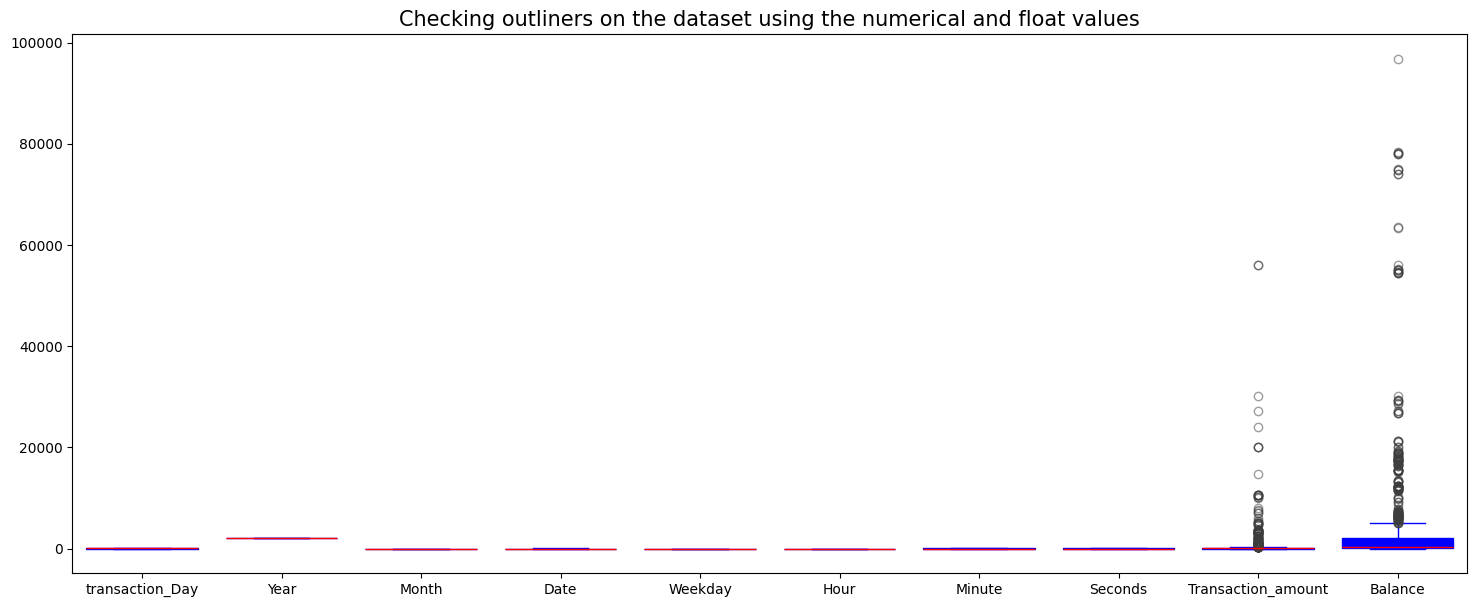

In [5]:
boxcolumns = prediction_data.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(18, 7))
sns.boxplot(data=boxcolumns, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
             medianprops=dict(color='red'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'), 
              flierprops=dict(marker='o', color='grey', alpha=0.5))
plt.title("Checking outliners on the dataset using the numerical and float values", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("Charts/Checking_outliners_on_the_dataset.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [6]:
# function for checking missing values
def missing_values(df: pd.DataFrame):
    missing_percentage = (df.isna().sum() / len(df)) * 100
    missing_df = pd.DataFrame({'Columns': df.columns, "Missing %": missing_percentage})
    missing_df = missing_df[missing_df['Missing %'] > 0].sort_values(by='Missing %', ascending=False)

    return missing_df

In [10]:
# returns no missing values on the prediction_data set
missing_values(prediction_data)

,Columns,Missing %


In [7]:
# checking outliners on the dataset
def check_outliners(df):
    """This function uses the quantile calculation to check outliners on the data
    Parameters used are df for the dataset and the function 
    1.5 threshold is somewhat arbitrary but works well 
    in practice to flag unusual points without being too sensitive.
    returns outliner dataframe"""
    outliners_data = []
    for columns in df.select_dtypes(include=['int', 'float']).columns:
        quant1 = df[columns].quantile(0.25)
        quant3 = df[columns].quantile(0.75)
        IQR = quant3 - quant1

        # compute outliner boundaries
        lowerBoundary = quant1 - 1.5 * IQR
        upperBoundary = quant3 + 1.5 * IQR

        # count the outliners on the dataset
        outliners = df[(df[columns] < lowerBoundary) | (df[columns] > upperBoundary)]
        outliner_count = outliners.shape[0]
        outliner_per = (outliner_count / df.shape[0]) * 100

        # append data to the list
        outliners_data.append({
            'columns':columns,
            'outliner_count': outliner_count,
            'outliner_percentage' : outliner_per,
            'lower Boundary': lowerBoundary,
            'upper Boundary': upperBoundary
        })
    outlinerDf = pd.DataFrame(outliners_data)
    return outlinerDf 

In [8]:
check_outliners(prediction_data)

,columns,outliner_count,outliner_percentage,lower Boundary,upper Boundary
0,transaction_Day,0,0.000000,-76.500,199.500
1,Year,0,0.000000,2022.500,2026.500
2,Month,0,0.000000,-11.500,24.500
3,Date,0,0.000000,-10.500,41.500
4,Weekday,0,0.000000,-5.000,11.000
5,Hour,0,0.000000,-2.000,30.000
6,Minute,0,0.000000,-32.500,83.500
7,Seconds,0,0.000000,-88.500,147.500
8,Transaction_amount,196,13.180901,-139.690,286.150
9,Balance,183,12.306658,-2950.405,5050.675


In [9]:
# dropping outliners
def drop_outliners(df: pd.DataFrame):
    no_outliners = df.copy()
    for columns in df.select_dtypes(include=['int', 'float']).columns:
        q1 = df[columns].quantile(.25)
        q3 = df[columns].quantile(.75)
        IQR = q3 - q1

        lowerbound = q1 - 1.5 * IQR
        upperbound = q3 + 1.5 * IQR

        # replace outliers on the data set
        no_outliners[columns] = df[columns].apply(lambda x : np.nan if (pd.notna(x) and (x < lowerbound or x > upperbound)) else x)
    return no_outliners
        

In [10]:
clean_data = drop_outliners(prediction_data)

In [11]:
missing_values(clean_data)

,Columns,Missing %
Transaction_amount,Transaction_amount,13.180901
Balance,Balance,12.306658


In [12]:
# filling missing values with median value
def fill_na(df):
    return df.fillna(df.median())

In [13]:
clean_data[['Balance', 'Transaction_amount']] = fill_na(clean_data[['Balance', 'Transaction_amount']])

In [14]:
missing_values(clean_data)

,Columns,Missing %


In [15]:
from sklearn.preprocessing import LabelEncoder

def custom_encoder(df: pd.DataFrame, encoding_type: str = 'label', 
                   special_column: str = 'Transaction_party', threshold: int = 10) -> pd.DataFrame:
    df_encoded = df.copy()

    # Select all object or category columns
    category_columns = df_encoded.select_dtypes(include=['category', 'object']).columns

    for col in category_columns:
        # Special case: Transaction_party → encode only frequent senders
        if col == special_column:
            sender_counts = df_encoded[col].value_counts()
            frequent_senders = sender_counts[sender_counts > threshold].index
            df_encoded[col] = df_encoded[col].apply(lambda x: x if x in frequent_senders else 'Other')
            
            label_enc = LabelEncoder()
            df_encoded[col] = label_enc.fit_transform(df_encoded[col].astype(str))
        
        else:
            # Normal encoding
            if encoding_type == 'label':
                label_enc = LabelEncoder()
                df_encoded[col] = label_enc.fit_transform(df_encoded[col].astype(str))
            
            elif encoding_type == 'onehot':
                df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True)
            
            else:
                print(f'Unsupported encoding type for column {col}. Use "label" or "onehot".')
    
    return df_encoded

In [16]:
df_encoding = custom_encoder(clean_data, encoding_type='label', special_column='Transaction_party', threshold=15)
df_encoding.sample(20)

,Receipt,transaction_Day,Year,Month,Date,Weekday,Hour,Minute,Seconds,Transaction_type,Transaction_party,Transaction_amount,paid_in_or_Withdraw,Balance
664,928,113,2025,2,18,1,17,57,0,13,13,150.00,1,1073.78
777,699,96,2025,1,25,5,19,38,0,9,3,111.18,0,120.00
460,1170,148,2025,3,27,3,18,35,0,4,13,65.00,1,0.00
1448,32,7,2024,10,10,3,10,36,59,4,9,45.00,1,0.00
1190,259,39,2024,11,20,2,9,29,59,4,15,60.00,1,1127.10
372,262,18,2024,11,21,3,19,18,16,18,13,60.00,0,1030.71
153,756,26,2025,2,5,2,11,22,3,4,13,0.00,0,616.00
912,487,75,2025,1,4,5,19,5,0,14,18,10.00,1,220.50
453,1176,149,2025,3,29,5,1,57,0,19,16,7.00,1,0.00
429,1185,152,2025,4,1,1,20,55,0,14,18,5.00,1,220.50


In [25]:
# splitting the dataset into training and testing
x = df_encoding[['Transaction_amount']]
y = df_encoding['Transaction_amount']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# scaling the values
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def get_scaler(scaling_type: str = 'standard'):
    if scaling_type == 'standard':
        return StandardScaler()
    elif scaling_type == 'minmax':
        return MinMaxScaler()
    else:
        raise ValueError('Unsupported scaler, use standard or minmax')
def scale_train_test(x_train, x_test, scaling_type='standard'):
    scaler = get_scaler(scaling_type)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    return x_train_scaled, x_test_scaled, scaler

In [27]:
x_train_scaled, x_test_scaled, scaler = scale_train_test(x_train, x_test, scaling_type='standard' )

In [30]:
# saving the model to file 
import pickle

#with open('Models/scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

with open('Models/df_encoding.pkl', 'wb') as f:
     pickle.dump(df_encoding, f)

In [31]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train_scaled, y_train)

# saving the model
with open('Models/Mpesa_LinearRegression.pkl', 'wb') as f:
    pickle.dump(model_lr, f)

In [32]:
y_pred = model_lr.predict(x_test_scaled)

In [38]:
# Evaluate the model
from sklearn.metrics import (
mean_squared_error, mean_absolute_error, r2_score, accuracy_score, 
f1_score, precision_score, confusion_matrix, roc_auc_score, 
recall_score, classification_report, accuracy_score)

mse = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics")
print()
print(f"Root mean square Error {rmse:.2f}")
print(f"Mean Absolute Error {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Regression Metrics

Root mean square Error 0.00
Mean Absolute Error 0.00
R2 Score: 1.00


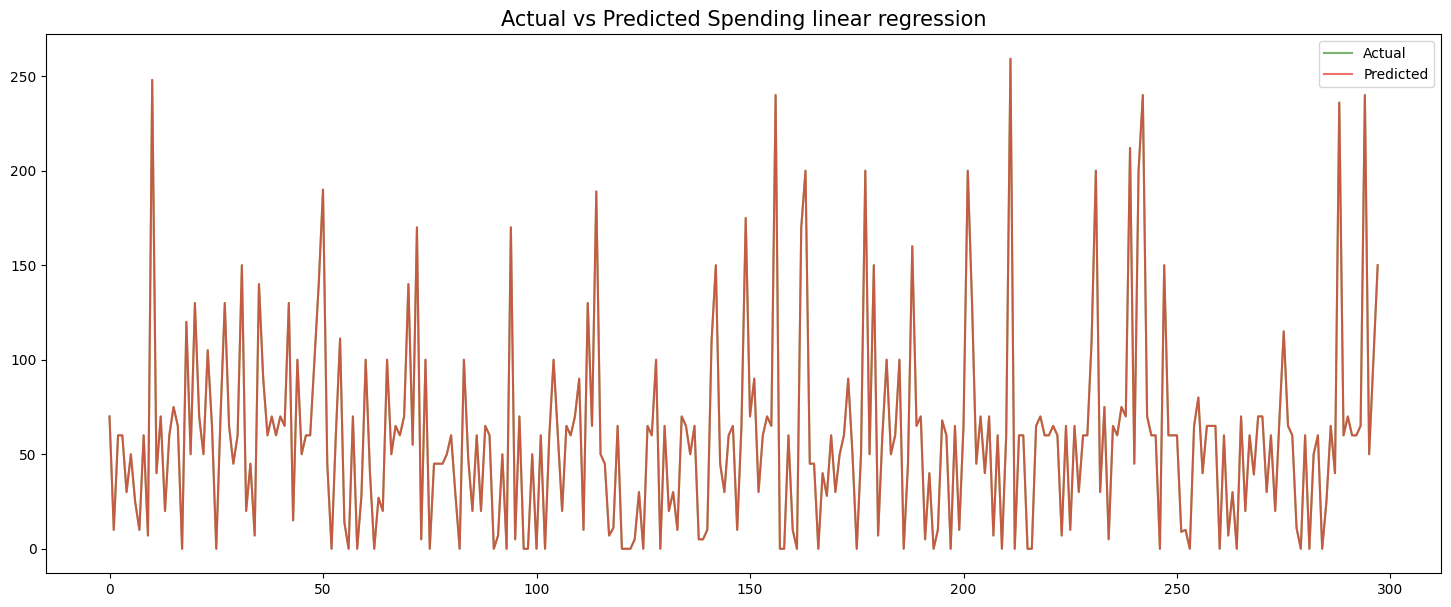

In [39]:
# visualizing the model
plt.figure(figsize=(18, 7))
plt.plot(y_test.values, label='Actual', alpha=0.7, color='#439534')
plt.plot(y_pred, label='Predicted', alpha=0.7, color='#E53631')
plt.legend()
plt.title("Actual vs Predicted Spending linear regression", fontsize=15)
plt.savefig("Charts/Actual_vs_predicted_spending_linear_regression.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [40]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf.fit(x_train_scaled, y_train)

with open('Models/Mpesa_RandomForestRegression.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [41]:
y_pred_rf = rf.predict(x_test_scaled)

In [42]:
# Evaluate the  Random Forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest")
print()
print(f"Root Mean Square Error: {rmse_rf:.2f}") 
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

Random Forest

Root Mean Square Error: 0.95
Mean Absolute Error: 0.15
R²: 1.00


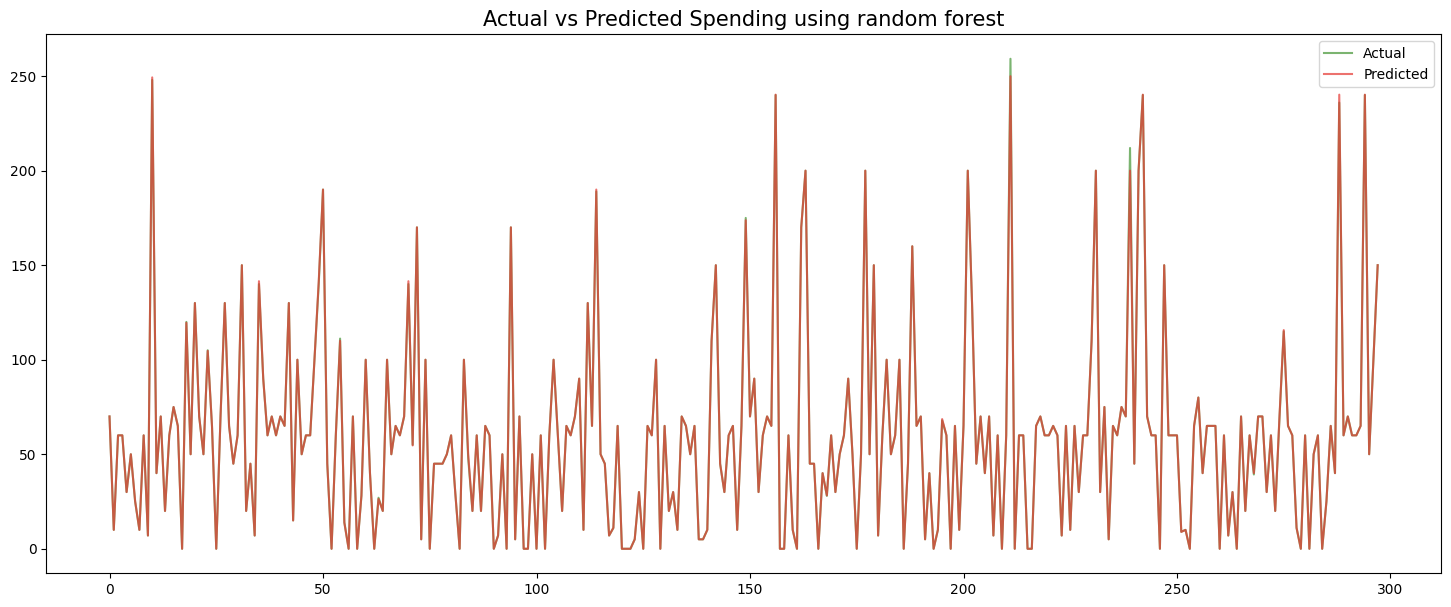

In [43]:
# visualizing the model
plt.figure(figsize=(18, 7))
plt.plot(y_test.values, label='Actual', alpha=0.7, color='#439534')
plt.plot(y_pred_rf, label='Predicted', alpha=0.7, color='#E53631')
plt.legend()
plt.title("Actual vs Predicted Spending using random forest", fontsize=15)
plt.savefig("Charts/Actual_vs_predicted_spending_using_random_forest.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [44]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators =100, learning_rate = 0.1, max_depth=5,random_state=42)
xgb.fit(x_train_scaled, y_train)

# saving the model

with open('Models/Mpesa_XGBRegressor.pkl', 'wb') as f:
    pickle.dump(xgb, f)

In [45]:
y_pred_xgb = xgb.predict(x_test_scaled)

In [46]:
# Evaluating the xgboost model
from sklearn.metrics import (
    accuracy_score, 
    precision_score) 
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost")
print()
print(f"Root Mean Square Error: {rmse_xgb:.2f}")
print(f"Mean Absolute Error: {mae_xgb:.2f}")
print(f"R2: {r2_xgb:.2f}")

XGBoost

Root Mean Square Error: 1.28
Mean Absolute Error: 0.19
R2: 1.00


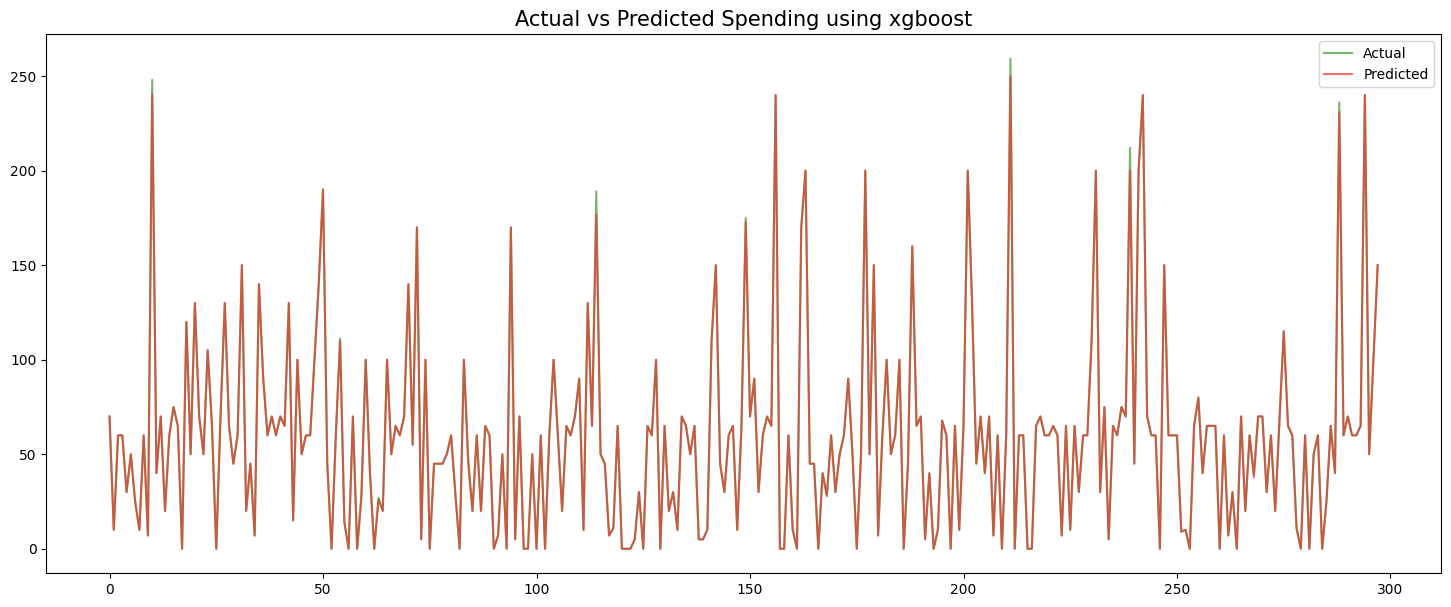

In [47]:
# visualizing the model
plt.figure(figsize=(18, 7))
plt.plot(y_test.values, label='Actual', alpha=0.7, color='#439534')
plt.plot(y_pred_xgb, label='Predicted', alpha=0.7, color='#E53631')
plt.legend()
plt.title("Actual vs Predicted Spending using xgboost", fontsize=15)
plt.savefig("Charts/Actual_vs_predicted_spending_using_xgboost.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [48]:
# making duplicate data
forecast = combined_data.copy()
forecast.rename(columns={
    "Date": "Day"
} ,inplace=True)

In [49]:
# Forecasting using Prophet
forecast["transation_time"] = pd.to_datetime(forecast[["Year", "Month", "Day", "Hour", "Minute", "Seconds"]])
forecast = forecast.sort_values("transation_time")

daily_df = forecast.groupby(forecast['transation_time'].dt.date)['Transaction_amount'].sum().reset_index()

daily_df.columns = ['ds', 'y']

In [51]:
# using prophet to model
from prophet import Prophet

model_pr = Prophet()
model_pr.fit(daily_df)

# saving the prophet model

with open('Models/Mpesa_prediction_prophet.pkl', 'wb') as f:
    pickle.dump(model_pr, f)

02:28:56 - cmdstanpy - INFO - Chain [1] start processing
02:28:56 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
future = model_pr.make_future_dataframe(periods=60)
forecast = model_pr.predict(future)

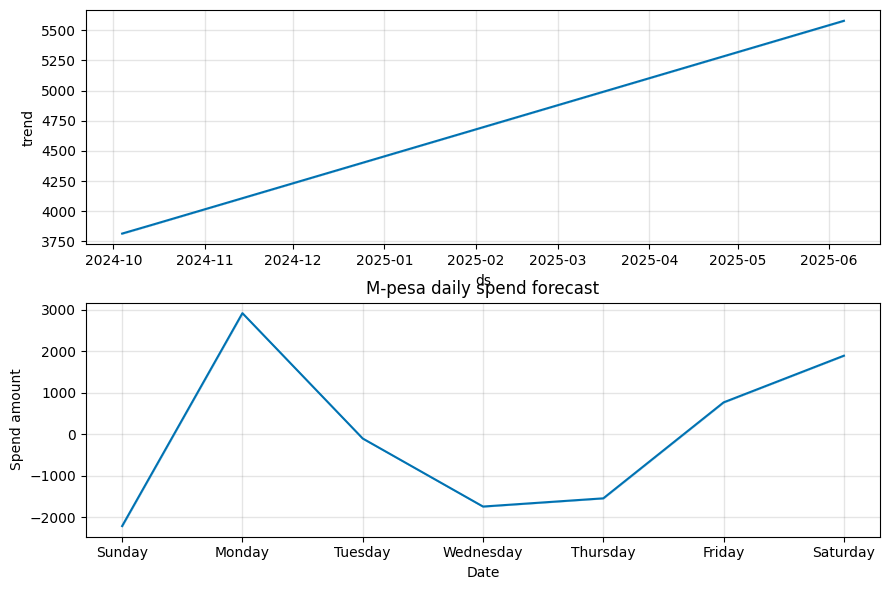

In [53]:
# visualizing the model
fig = model_pr.plot_components(forecast)
# fig = model.plot(forecast)
plt.title("M-pesa daily spend forecast")
plt.xlabel("Date")
plt.ylabel("Spend amount")
plt.savefig("Charts/mpesa_daily_spending_forecast_using_prophet.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [17]:
prediction_data.columns

Index(['Receipt', 'transaction_Day', 'Year', 'Month', 'Date', 'Weekday',
       'Hour', 'Minute', 'Seconds', 'Transaction_type', 'Transaction_party',
       'Transaction_amount', 'paid_in_or_Withdraw', 'Balance'],
      dtype='object')